In [1]:
# project: p5
# submitter: lin364
# partner: none
# hours: 10
import pandas as pd
from zipfile import ZipFile
from io import TextIOWrapper
import csv
import edgar_utils

In [2]:
#q1
with ZipFile('server_log.zip') as zf:
            cf = zf.namelist()[0]
            df = pd.read_csv(zf.open(cf))
            size_sum = df['size'].sum()
int(size_sum)

24801002666

In [3]:
#q2
ip_df = df['ip']
ip_dict = {}
for ip in ip_df:
    if ip in ip_dict.keys():
        ip_dict[ip]+=1
    else:
        ip_dict[ip] = 1
t = sorted(ip_dict.items(), key=lambda x:-x[1])[:10]
dict(t)

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [4]:
#q3
q3 = 0
for n in df['code']:
    n = float(n)
    if n >= 400.0:
        q3+=1
float(q3/len(df))

0.03466852724527611

In [5]:
#q4
q4 = {}
for index, row in df.iterrows():
    file_path = f"{int(row['cik'])}/{row['accession']}/{row['extention']}"
    if file_path in q4:
        q4[file_path] += 1
    else:
        q4[file_path] = 1
max(q4, key=q4.get)

'1627631/0001627631-15-000004/.txt'

In [6]:
#q5
int(df['crawler'].sum())

971

In [7]:
#q6
from edgar_utils import lookup_region
q6 = {}
for index, row in df.iterrows():
    ip = row['ip']
    region = lookup_region(ip)
    if region in q6:
        q6[region] += 1
    else:
        q6[region] = 1
max(q6, key=q6.get)

'United States of America'

In [8]:
#q7
q7 = {}
output = {}
for key, value in ip_dict.items():
    region = lookup_region(key)
    if region not in q7:
        q7[region] = [0, 1]
    else:
        q7[region][1] += 1
    if value > 1000:
        q7[region][0] += 1
for key, value in q7.items():
    output[key] = value[0]/value[1]
output

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'Hong Kong': 0.0,
 'Ireland': 0.3125,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Czechia': 0.0,
 'Germany': 0.0,
 'Bulgaria': 0.3333333333333333,
 'France': 0.0036900369003690036,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Australia': 0.07692307692307693,
 'Spain': 0.0,
 'Netherlands': 0.0,
 'Sweden': 0.0,
 'Sudan': 0.0,
 'Estonia': 0.0,
 'Russian Federation': 0.0,
 'Tanzania, United Republic of': 0.0,
 'Yemen': 0.0,
 'Algeria': 0.0,
 'Ukraine': 0.0,
 'Slovakia': 0.0,
 'Viet Nam': 0.0,
 'Denmark': 0.0,
 'Singapore': 0.0,
 'Switzerland': 0.0,
 'Thailand': 0.0,
 'South Africa': 0.0,
 'Italy': 0.0,
 'Poland': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Brazil': 0.0,
 'Morocco': 0.0,
 'Malaysia': 0.0,
 'Hungary': 0.0,
 'Japan': 0.0,
 'Luxembourg': 0.0,
 'Romania': 0.0,
 'Liberia': 0.0,
 'Israel': 0.0,
 'Bangladesh': 0.0

In [9]:
#q8
q8 = {}
with ZipFile('docs.zip') as zf:
    for fname in zf.namelist():
        if 'htm' in fname:
            with zf.open(fname, "r") as f:
                text = f.read().decode("utf-8")
                file = edgar_utils.Filing(text)
                q8[fname] = file
q8['850693/0000850693-07-000159/-index.htm'].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [10]:
#q9
q9 = {}

for key, value in q8.items():
    state = value.state()
    if state != None:
        if state in q9:
            q9[state] += 1
        else:
            q9[state] = 1
q9 = dict(sorted(q9.items(), key=lambda x:-x[1]))
q9

{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'CO': 25,
 'IL': 25,
 'PA': 25,
 'NJ': 23,
 'FL': 21,
 'VA': 15,
 'MN': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'NC': 9,
 'WI': 9,
 'GA': 8,
 'OK': 7,
 'OX': 6,
 'NV': 6,
 'IA': 6,
 'UT': 5,
 'KS': 5,
 'AZ': 5,
 'IN': 4,
 'TN': 4,
 'MO': 4,
 'WA': 3,
 'KY': 2,
 'NE': 2,
 'LA': 2,
 'OR': 2,
 'WV': 2,
 'MS': 1,
 'AL': 1,
 'SD': 1,
 'NM': 1,
 'AR': 1,
 'VT': 1,
 'ID': 1,
 'DC': 1,
 'ME': 1}

In [11]:
#q10

q10 = {}

for key, value in q8.items():
    sic = value.sic
    if sic != None:
        if sic in q10:
            q10[sic] += 1
        else:
            q10[sic] = 1
q10 = dict(sorted(q10.items(), key=lambda x:-x[1]))
q10

{2834: 40,
 6022: 20,
 1311: 20,
 6798: 20,
 6021: 20,
 1389: 19,
 6189: 17,
 6211: 17,
 2836: 13,
 7389: 11,
 1000: 11,
 7372: 11,
 6029: 11,
 6331: 10,
 6199: 8,
 4911: 8,
 2860: 8,
 6282: 8,
 7370: 7,
 3841: 6,
 7371: 6,
 3674: 5,
 4931: 5,
 1700: 5,
 4522: 5,
 8742: 5,
 900: 5,
 3826: 5,
 7374: 4,
 2510: 4,
 6035: 4,
 4813: 4,
 3842: 4,
 3663: 4,
 5812: 4,
 3620: 3,
 6221: 3,
 3829: 3,
 6799: 3,
 3420: 3,
 3510: 3,
 8062: 3,
 1400: 3,
 3576: 3,
 2800: 3,
 7200: 3,
 7373: 3,
 8731: 2,
 1040: 2,
 2810: 2,
 3990: 2,
 5940: 2,
 1731: 2,
 6311: 2,
 8082: 2,
 6324: 2,
 6321: 2,
 3845: 2,
 1221: 2,
 3669: 2,
 5900: 2,
 5500: 2,
 4841: 2,
 8711: 2,
 5172: 2,
 1382: 2,
 7812: 2,
 4922: 2,
 3679: 2,
 3621: 2,
 5122: 2,
 3661: 2,
 3577: 2,
 6141: 2,
 3272: 2,
 3695: 2,
 3559: 2,
 3690: 2,
 2111: 2,
 3825: 2,
 1531: 2,
 2870: 2,
 4812: 2,
 5065: 2,
 7900: 2,
 5661: 2,
 4512: 2,
 7830: 2,
 3571: 1,
 7361: 1,
 3140: 1,
 6200: 1,
 7381: 1,
 4941: 1,
 5621: 1,
 7330: 1,
 8051: 1,
 3550: 1,
 2890: 

In [12]:
#q11

# dict = {SIC: number of access}
# each row -> htm in file_path ? search through q8 and get sic : pass
q11 = {}
for path, counter in q4.items():
    if 'htm' in path and path in q8.keys():
        sic = q8[path].sic
        if sic:
            if sic in q11:
                q11[sic] += counter
            else:
                q11[sic] = counter
q11 = dict(sorted(q11.items(), key=lambda x:-x[1]))
q11

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [13]:
#q12
q12 = {}
time_c = df['time']
for time in time_c:
    hour = int(time[:2])
    if hour in q12:
        q12[hour] += 1
    else:
        q12[hour] = 1
q12


{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

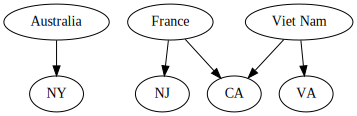

In [14]:
#q13
from graphviz import Digraph, Graph

g = Digraph()
q13 = {'Australia':[], 'France':[], 'Viet Nam':[]}
count_ip = {key: None for key in ip_dict.keys()}

for index, row in df.iterrows():
    ip = row['ip']
    if not count_ip[ip]: # ip never accessed
        country = lookup_region(ip)
        if country in q13.keys():
            file_path = f"{int(row['cik'])}/{row['accession']}/{row['extention']}"
            
            if 'htm' in file_path and file_path in q8.keys():
                state = q8[file_path].state()
                if state: # state not None
                    if state not in q13[country]:
                        q13[country].append(state)

for country in q13.keys():
    g.node(country)

for country, states in q13.items():
    for state in states:
        g.edge(country, state)
g

In [15]:
#q14

q14 = {}
out = {}
for index, row in df.iterrows():
    file_path = f"{int(row['cik'])}/{row['accession']}/{row['extention']}"
    if 'htm' in file_path and file_path in q8.keys():
        addr = q8[file_path].addresses
        for add in addr:
            if add in q14.keys():
                q14[add]+= 1
            else:
                q14[add] = 1
for key, value in q14.items():
    if value >= 225:
        out[key] = value
out

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

<AxesSubplot:>

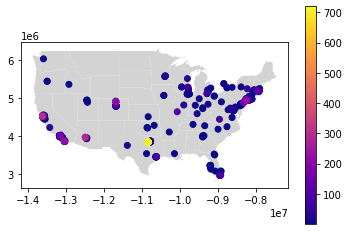

In [16]:
#q15
import geopandas as gpd
from shapely.geometry import box

west = -130
east = -55
north = 50
south = 20

# map
window = box(west, south, east, north)
df = gpd.read_file('shapes/cb_2018_us_state_20m.shp')
df = df[df.intersects(window)]
df = df.to_crs("epsg:3395")
ax = df.plot(color='lightgray')

# plotting
addrs = {}
for key, value in q14.items():
    addr = key.replace('\n','').strip()
    addrs[addr] = value

plots = gpd.read_file('locations.geojson')
plots = plots[plots.intersects(window)]
plots = plots.to_crs("epsg:3395")

plots['freq'] = 0
for idx, row in plots.iterrows():
    addr = row['address'].replace('\n','').strip()
    if addr in addrs.keys():
        plots.at[idx, 'freq'] = addrs[addr]
plots = plots.sort_values(by='freq')

plots.plot(ax=ax, c=plots['freq'], cmap='plasma', legend=True, column='freq')
